In [ ]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import joblib
from sklearn.metrics import accuracy_score

In [ ]:
df=pd.read_csv(r"/content/collegePlace.csv") 

In [ ]:
df.shape

(2966, 8)

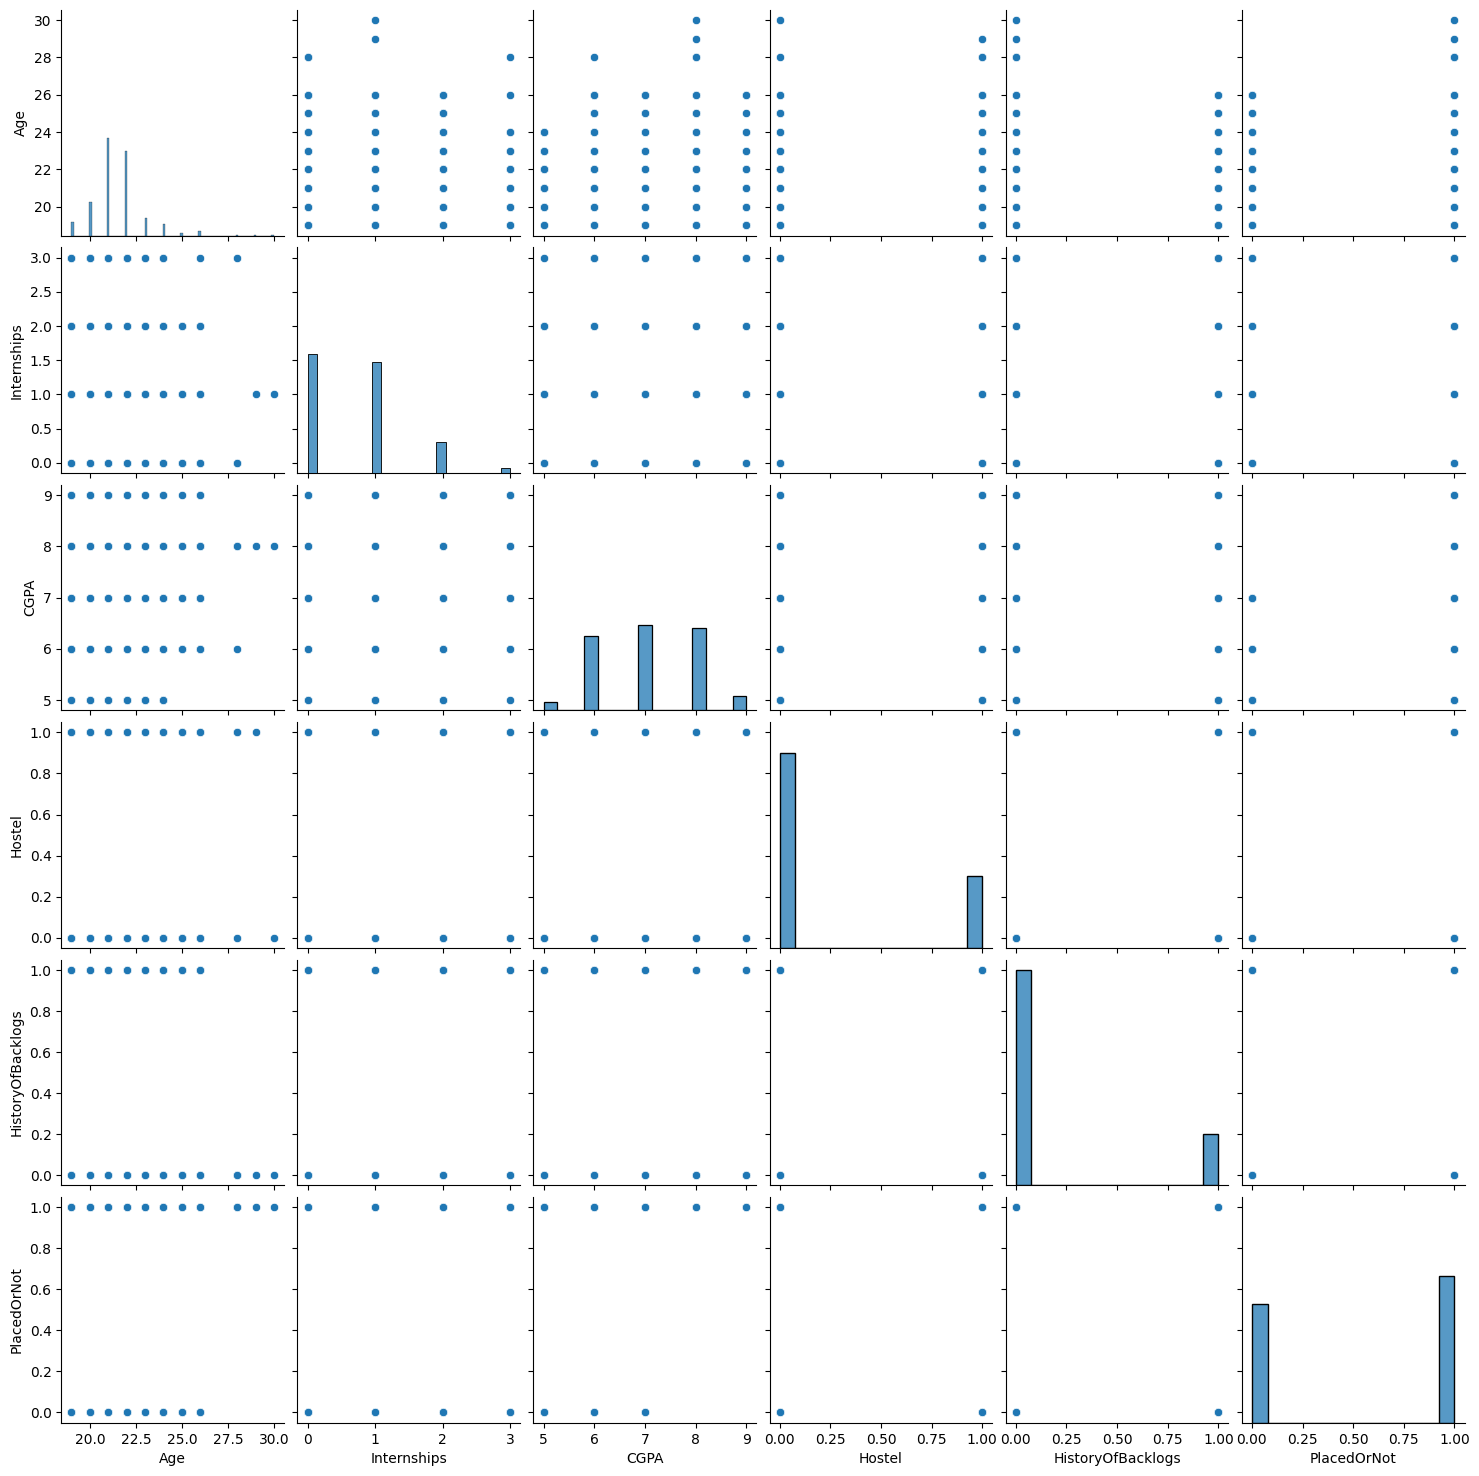

In [ ]:
sns.pairplot(df)

In [ ]:
corr=df.corr()

<ipython-input-8-0014364bc22a>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=df.corr()


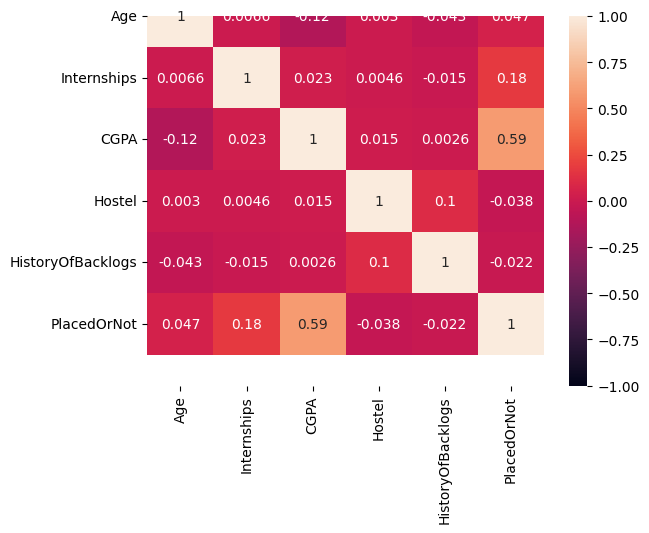

,Age,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
Age,1.000000,0.006552,-0.119787,0.003042,-0.042586,0.046943
Internships,0.006552,1.000000,0.023496,0.004617,-0.015118,0.179334
CGPA,-0.119787,0.023496,1.000000,0.014991,0.002576,0.588648
Hostel,0.003042,0.004617,0.014991,1.000000,0.103506,-0.038182
HistoryOfBacklogs,-0.042586,-0.015118,0.002576,0.103506,1.000000,-0.022337
PlacedOrNot,0.046943,0.179334,0.588648,-0.038182,-0.022337,1.000000


In [ ]:
ax=sns.heatmap(corr,vmin=-1,vmax=1,annot=True)
bottom,top=ax.get_ylim()
ax.set_ylim(bottom+0.5,top=0.5)
plt.show()
corr

<ipython-input-10-f92659182652>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['CGPA'],color='r')


<Axes: xlabel='CGPA', ylabel='Density'>

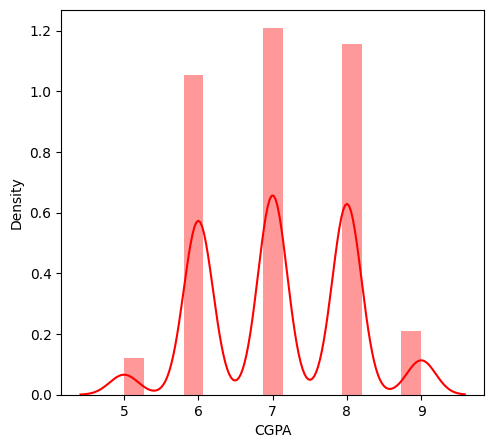

In [ ]:
plt.figure(figsize=(12,5))
plt.subplot(121)
sns.distplot(df['CGPA'],color='r')

<ipython-input-11-e6619e4b3ca5>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['PlacedOrNot'],color='r')


<Axes: xlabel='PlacedOrNot', ylabel='Density'>

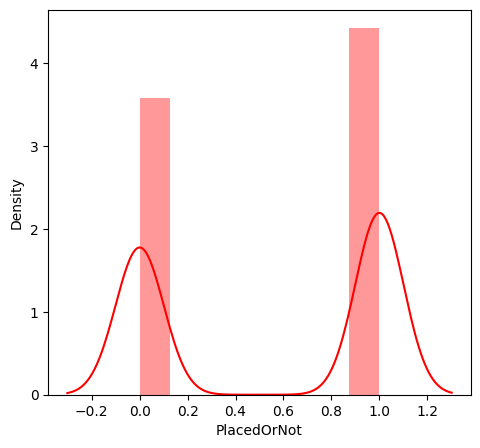

In [ ]:
plt.figure(figsize=(12,5))
plt.subplot(121)
sns.distplot(df['PlacedOrNot'],color='r')           

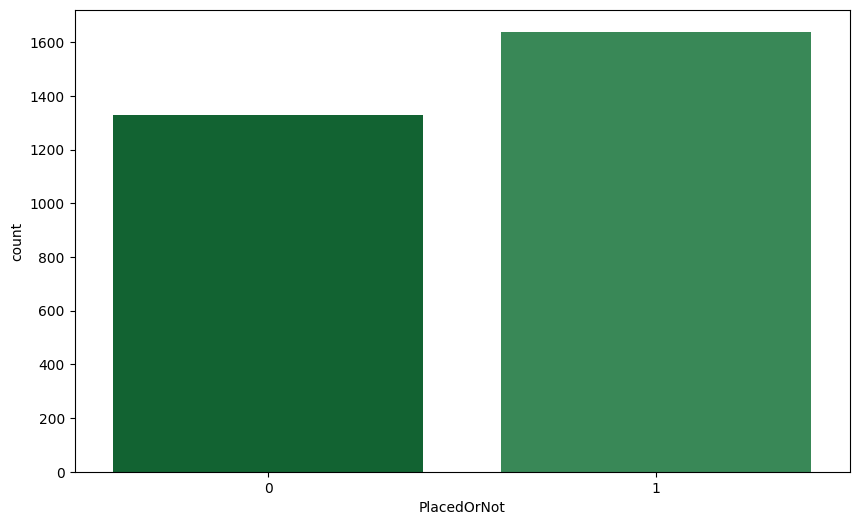

In [ ]:
plt.figure(figsize=(10,6),dpi=100)                                                                                                    

color_palette=sns.color_palette("BuGn_r")
sns.set_palette(color_palette)

sns.countplot(x="PlacedOrNot",data=df)
plt.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2966 entries, 0 to 2965
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Age                2966 non-null   int64 
 1   Gender             2966 non-null   object
 2   Stream             2966 non-null   object
 3   Internships        2966 non-null   int64 
 4   CGPA               2966 non-null   int64 
 5   Hostel             2966 non-null   int64 
 6   HistoryOfBacklogs  2966 non-null   int64 
 7   PlacedOrNot        2966 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 185.5+ KB


In [ ]:
df.isnull().sum()

Age                  0
Gender               0
Stream               0
Internships          0
CGPA                 0
Hostel               0
HistoryOfBacklogs    0
PlacedOrNot          0
dtype: int64

In [ ]:
df.describe()

,Age,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
count,2966.000000,2966.000000,2966.000000,2966.000000,2966.000000,2966.000000
mean,21.485840,0.703641,7.073837,0.269049,0.192178,0.552596
std,1.324933,0.740197,0.967748,0.443540,0.394079,0.497310
min,19.000000,0.000000,5.000000,0.000000,0.000000,0.000000
25%,21.000000,0.000000,6.000000,0.000000,0.000000,0.000000
50%,21.000000,1.000000,7.000000,0.000000,0.000000,1.000000
75%,22.000000,1.000000,8.000000,1.000000,0.000000,1.000000
max,30.000000,3.000000,9.000000,1.000000,1.000000,1.000000


In [ ]:
df['Gender'].value_counts()

Male      2475
Female     491
Name: Gender, dtype: int64

In [ ]:
df['Stream'].value_counts()

Computer Science                 776
Information Technology           691
Electronics And Communication    424
Mechanical                       424
Electrical                       334
Civil                            317
Name: Stream, dtype: int64

In [ ]:
df=df.replace(['Male'],[0])
df=df.replace(['Female'],[1])

In [ ]:
df=df.replace(['Computer Science','Information Technology','Electronics And Communication','Mechanical','Electrical','Civil'],[0,1,2,3,4,5])

In [ ]:
df

,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
0,22,0,2,1,8,1,1,1
1,21,1,0,0,7,1,1,1
2,22,1,1,1,6,0,0,1
3,21,0,1,0,8,0,1,1
4,22,0,3,0,8,1,0,1
...,...,...,...,...,...,...,...,...
2961,23,0,1,0,7,0,0,0
2962,23,0,3,1,7,1,0,0
2963,22,0,1,1,7,0,0,0
2964,22,0,0,1,7,0,0,0


In [ ]:
df.head()

,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
0,22,0,2,1,8,1,1,1
1,21,1,0,0,7,1,1,1
2,22,1,1,1,6,0,0,1
3,21,0,1,0,8,0,1,1
4,22,0,3,0,8,1,0,1


<ipython-input-22-6fba3c2af64a>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(feature)


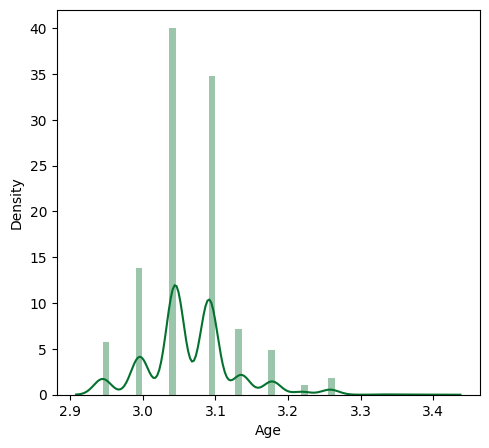

In [ ]:
def transformationplot(feature):
   plt.figure(figsize=(12,5))
   plt.subplot(1,2,1)
   sns.distplot(feature)
transformationplot(np.log(df['Age']))

In [ ]:
df=df.drop(['Hostel'],axis=1)

In [ ]:
df

,Age,Gender,Stream,Internships,CGPA,HistoryOfBacklogs,PlacedOrNot
0,22,0,2,1,8,1,1
1,21,1,0,0,7,1,1
2,22,1,1,1,6,0,1
3,21,0,1,0,8,1,1
4,22,0,3,0,8,0,1
...,...,...,...,...,...,...,...
2961,23,0,1,0,7,0,0
2962,23,0,3,1,7,0,0
2963,22,0,1,1,7,0,0
2964,22,0,0,1,7,0,0


In [ ]:
X=df.drop(columns='PlacedOrNot',axis=1)
Y=df['PlacedOrNot']

In [ ]:
import joblib
joblib.dump(X,"placement")

['placement']

In [ ]:
print(X)

      Age  Gender  Stream  Internships  CGPA  HistoryOfBacklogs
0      22       0       2            1     8                  1
1      21       1       0            0     7                  1
2      22       1       1            1     6                  0
3      21       0       1            0     8                  1
4      22       0       3            0     8                  0
...   ...     ...     ...          ...   ...                ...
2961   23       0       1            0     7                  0
2962   23       0       3            1     7                  0
2963   22       0       1            1     7                  0
2964   22       0       0            1     7                  0
2965   23       0       5            0     8                  0

[2966 rows x 6 columns]


In [ ]:
print(Y)

0       1
1       1
2       1
3       1
4       1
       ..
2961    0
2962    0
2963    0
2964    0
2965    1
Name: PlacedOrNot, Length: 2966, dtype: int64


In [ ]:
scaler=StandardScaler()

In [ ]:
scaler.fit(X)

StandardScaler()

In [ ]:
standardized_data=scaler.transform(X)

In [ ]:
print(standardized_data)

[[ 0.38813058 -0.44540301  0.04008175  0.40044544  0.95719068  2.05024603]
 [-0.36675158  2.24515772 -1.14874288 -0.95077319 -0.07631043  2.05024603]
 [ 0.38813058  2.24515772 -0.55433057  0.40044544 -1.10981154 -0.48774634]
 ...
 [ 0.38813058 -0.44540301 -0.55433057  0.40044544 -0.07631043 -0.48774634]
 [ 0.38813058 -0.44540301 -1.14874288  0.40044544 -0.07631043 -0.48774634]
 [ 1.14301273 -0.44540301  1.82331869 -0.95077319  0.95719068 -0.48774634]]


In [ ]:
X=standardized_data
Y=df['PlacedOrNot']

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=2)

In [ ]:
print(X.shape,X_train.shape,X_test.shape)

(2966, 6) (2372, 6) (594, 6)


In [ ]:
classifier=svm.SVC(kernel='linear')

In [ ]:
classifier.fit(X_train,Y_train)

SVC(kernel='linear')

In [ ]:
X_test_prediction=classifier.predict(X_test)
y_pred=accuracy_score(X_test_prediction,Y_test)
y_pred

0.7794612794612794

In [ ]:
X_test

array([[-0.36675158,  2.24515772,  0.04008175,  1.75166407, -0.07631043,
        -0.48774634],
       [ 0.38813058, -0.44540301,  0.63449406, -0.95077319, -0.07631043,
        -0.48774634],
       [ 1.89789488, -0.44540301, -0.55433057,  0.40044544, -0.07631043,
        -0.48774634],
       ...,
       [-1.12163373, -0.44540301,  0.63449406,  0.40044544,  1.99069179,
        -0.48774634],
       [ 0.38813058, -0.44540301, -1.14874288,  0.40044544, -1.10981154,
        -0.48774634],
       [ 0.38813058,  2.24515772, -0.55433057,  0.40044544,  0.95719068,
        -0.48774634]])

In [ ]:
X_train_prediction=classifier.predict(X_train)
training_data_accuracy=accuracy_score(X_train_prediction,Y_train)

In [ ]:
print('Accuracy score of the training data:',training_data_accuracy)

Accuracy score of the training data: 0.7685497470489039


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.model_selection import cross_val_score

In [ ]:
best_k={"Regular":0}
best_score={"Regular":0}
for k in range(3,50,2):
  knn_temp=KNeighborsClassifier(n_neighbors=k)
  knn_temp.fit(X_train,Y_train)
  knn_temp_pred=knn_temp.predict(X_test)
  score=metrics.accuracy_score(Y_test,knn_temp_pred)
  if score>=best_score["Regular"] and score<100:
    best_score["Regular"]=score
    best_k["Regular"]=k


In [ ]:
print("---Results---\nK: {}\nScore:{}".format(best_k,best_score))
knn=KNeighborsClassifier(n_neighbors=best_k["Regular"])
knn.fit(X_train,Y_train)
knn_pred=knn.predict(X_test)
testd=accuracy_score(knn_pred,Y_test)

---Results---
K: {'Regular': 7}
Score:{'Regular': 0.8619528619528619}


In [ ]:
knn_pred

array([1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
print('Accuracy score of the test data using KNN:',testd)


Accuracy score of the test data using KNN: 0.8619528619528619


In [ ]:
knn_pred_1=knn.predict(X_train)
traind=accuracy_score(knn_pred_1,Y_train)
traind

0.8882799325463744

In [ ]:
knn_pred_1

array([1, 0, 0, ..., 1, 1, 1])

In [ ]:
X_train.shape

(2372, 6)

In [ ]:
Y_train.shape

(2372,)

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from tensorflow.keras import layers

In [ ]:
classifier=Sequential()
classifier.add(keras.layers.Dense(6,activation='relu',input_dim=6))
classifier.add(keras.layers.Dropout(0,50))
classifier.add(keras.layers.Dense(6,activation='relu'))
classifier.add(keras.layers.Dropout(0,50))
classifier.add(keras.layers.Dense(1,activation='sigmoid'))

In [ ]:
loss_1=tf.keras.losses.BinaryCrossentropy()
classifier.compile(optimizer='Adam',loss=loss_1,metrics=['accuracy'])



In [ ]:
classifier.fit(X_train,Y_train,batch_size=20,epochs=100)

Epoch 1/100
119/119 [==============================] - 2s 4ms/step - loss: 0.7008 - accuracy: 0.5535
Epoch 2/100
119/119 [==============================] - 0s 4ms/step - loss: 0.6272 - accuracy: 0.6488
Epoch 3/100
119/119 [==============================] - 0s 3ms/step - loss: 0.5470 - accuracy: 0.7601
Epoch 4/100
119/119 [==============================] - 0s 3ms/step - loss: 0.4762 - accuracy: 0.7774
Epoch 5/100
119/119 [==============================] - 0s 3ms/step - loss: 0.4280 - accuracy: 0.7934
Epoch 6/100
119/119 [==============================] - 0s 3ms/step - loss: 0.3976 - accuracy: 0.8035
Epoch 7/100
119/119 [==============================] - 0s 2ms/step - loss: 0.3770 - accuracy: 0.8153
Epoch 8/100
119/119 [==============================] - 0s 2ms/step - loss: 0.3611 - accuracy: 0.8267
Epoch 9/100
119/119 [==============================] - 0s 2ms/step - loss: 0.3499 - accuracy: 0.8385
Epoch 10/100
119/119 [==============================] - 0s 2ms/step - loss: 0.3416 - accura

In [ ]:
pred=classifier.predict(X_test)
pred=(pred>0.5)
pred

19/19 [==============================] - 0s 1ms/step


array([[ True],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [

In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(Y_test,pred)
cm

array([[241,  25],
       [ 69, 259]])

In [ ]:
import pickle
pickle.dump(knn,open("placement.pkl",'wb'))
model=pickle.load(open('placement.pkl','rb'))

In [ ]:
input_data=[[22,0,2,1,8,1]]

In [ ]:
prediction=knn.predict(input_data)
print(prediction)

if (prediction[0]==0):
  print('not placed')
else:
  print('placed')  

[1]
placed


In [ ]:
from flask import Flask,render_template,request
import pickle
import joblib

app=Flask(__name__)
model=pickle.load(open("placement.pkl",'rb'))
ct=joblib.load('placement')

In [ ]:
@app.route('/')
def hello():
  return render_template("index.html")

In [ ]:
@app.route('/guest',methods=["POST"])
def Guest():
  sen1=request.form["sen1"]
  sen2=request.form["sen2"] 
  sen3=request.form["sen3"]
  sen4=request.form["sen4"]
  sen5=request.form["sen5"]
  sen6=request.form["sen6"]

@app.route('/y_predict',methods=["POST"])
def y_predict():
  X_test=[[(yo) for yo in request.form.values()]]
  prediction=model.predict(x_test)
  prediction=prediction[0]
  return render_template("secondpage.html",y=prediction)

In [ ]:
if__name__=='__main__':
   app.run(debug=True)

SyntaxError: ignored

NameError: ignored

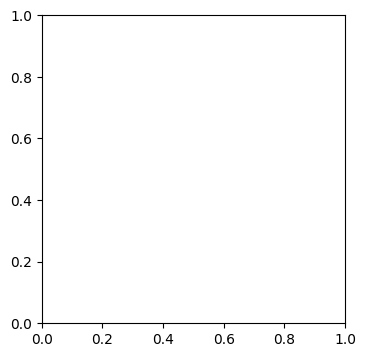

In [ ]:
plt.figure(figsize=(18,4))
plt.subplot(1,4,1)
sns.countplot(data['Gender'])
plt.subplot(1,4,2)
sns.countplot(data['Education'])
plt.show()

KeyError: ignored

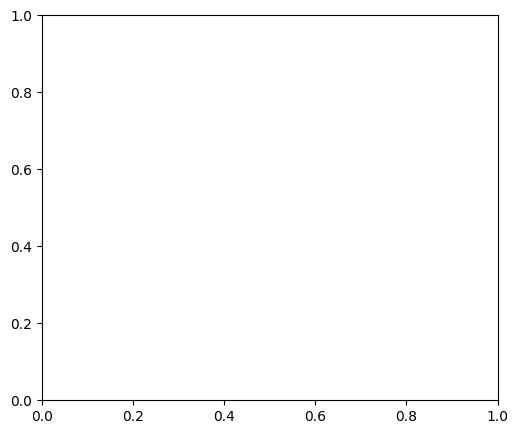

In [ ]:
plt.figure(figsize=(20,5))
plt.subplot(131)
sns.countplot(df["PlaceOrNot"],hue=df['CGPA'])

In [ ]:
sns.swarmplot(df['PlacedOrNot'],df['CGPA'],hue=df['Stream'])

TypeError: ignored

In [ ]:
sc=StandardScaler()
x_bal=sc.fit_transformation(x_bal)

AttributeError: ignored

In [ ]:
x_bal=pd.DataFrame(x_bal,columns=names)

NameError: ignored

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=2)

In [ ]:
from colorsys import yiq_to_rgb
best_k={"Regular":0}
best_score={"Regular":0}
for k in range (3,50,2):
    knn_temp=KNeighborsClassifier(n_neighbors=k)
    knn_temp.fit(X_train,Y_train)
    knn_temp_pred=knn_temp.predict(X_test)
    score=metrics.accuracy_score(Y_test,  knn_temp_pred)* 100
    if score>=best_score["Regular"]and score<100:
      best_score["Regular"]=score
      best_k["Regular"]=k
      

In [ ]:
<section id ="hero" class="d-flex flex-column justify-content-center">
  <div class="container">
    <div class="row justify-content-center">
     <div class="col-xl-8">
      <h1>Identifying patterns and Trends in Campus Placement Data using Machine Learning</h1>
     </div>
    </div>
   </div>
  </section><!--End Hero-->    


IndentationError: ignored

In [ ]:
<section id="about"class="about">
 <div class="container">
  <div class ="section-title">
   <h2>Fill the details</h2>

   </div>
   <div class="row content">
    <div class="first">
     <form  action="{{ url_for('y_predict')}}"method="POST">
      <input type ="number" id="sen1" name="sen1" placeholder="Age">
      <input type ="number" id="sen2" name="sen2" placeholder="Gender M(0),F(0)">
      <input type ="number" id="sen3" name="sen3" placeholder="Stream CS(0),IT(1),ECE(2),Mech(3),Civil">
      <input type ="number" id="sen4" name="sen4" placeholder="Internships">
      <input type ="number" id="sen5" name="sen5" placeholder="CGPA">
      <input type ="number" id="sen6" name="sen6" placeholder="Number of backlogs">

    </form>
   </div>
  </div>

 </div>
</section><!--End About Us Section-->     


In [ ]:
<section id ="hero" class="d-flex flex-column justify-content-center">
  <div class="container">
    <div class="row justify-content-center">
     <div class="col-xl-8">
      <h1>The prediction is:{{y}}<h1>
      <h3>0 represents Not-Placed</h3>
      <h3>1 represents Placed<h2>

    </div>  
  </div>
 </div>
</section><!--End Hero-->    



IndentationError: ignored

In [ ]:
@app.route('/')
def hello():
  return render_template("index.html")

In [ ]:
@app.route('/guest',methods=["POST"])
def Guest():
  sen1=request.form["sen1"]
  sen2=request.form["sen2"] 
  sen3=request.form["sen3"]
  sen4=request.form["sen4"]
  sen5=request.form["sen5"]
  sen6=request.form["sen6"]

@app.route('/y_predict',methods=["POST"])
def y_predict():
  X_test=[[(yo) for yo in request.form.values()]]
  prediction=model.predict(x_test)
  prediction=prediction[0]
  return render_template("secondpage.html",y=prediction)

In [ ]:
app.run(debug=True)

 * Serving Flask app '__main__'
 * Debug mode: on


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug: * Restarting with stat


In [ ]:
from flask.templating import Environment
  Serving Flask app"app"(lazy loading)
  Environment:production
  Debug mode:on
  Restarting with watchdog(windowsapi)
  Debugger is active!
  Debugger PIN:146-359-021
  Running on http://127.0.0.1:5000/(Press CTRL+C to quit)

IndentationError: ignored